* Źródła:
* https://docs.opencv.org/3.4/de/d4d/tutorial_py_kmeans_understanding.html
* https://docs.opencv.org/3.4/d1/d5c/tutorial_py_kmeans_opencv.html

# Algorytm
Jest to algorytm, który grupuje elementy. Wybiera k elementów losowych - centroidów. Następnie dla każdego elementu liczy odległość i przyporządkowywuje do najbliższego centroidu. Następnie centroidy są wyliczane ponownie znowu następuje przyporządkowanie. Koniec działania występuje po x iteracjach lub gdy centroidami zostaną nieruchome punkty.

Za jego pomocą można dokonać kwantyfikacji kolorów na zdjęciu. Po odpaleniu kodu zdjęcie wyświetli się w oddzielnym oknie.

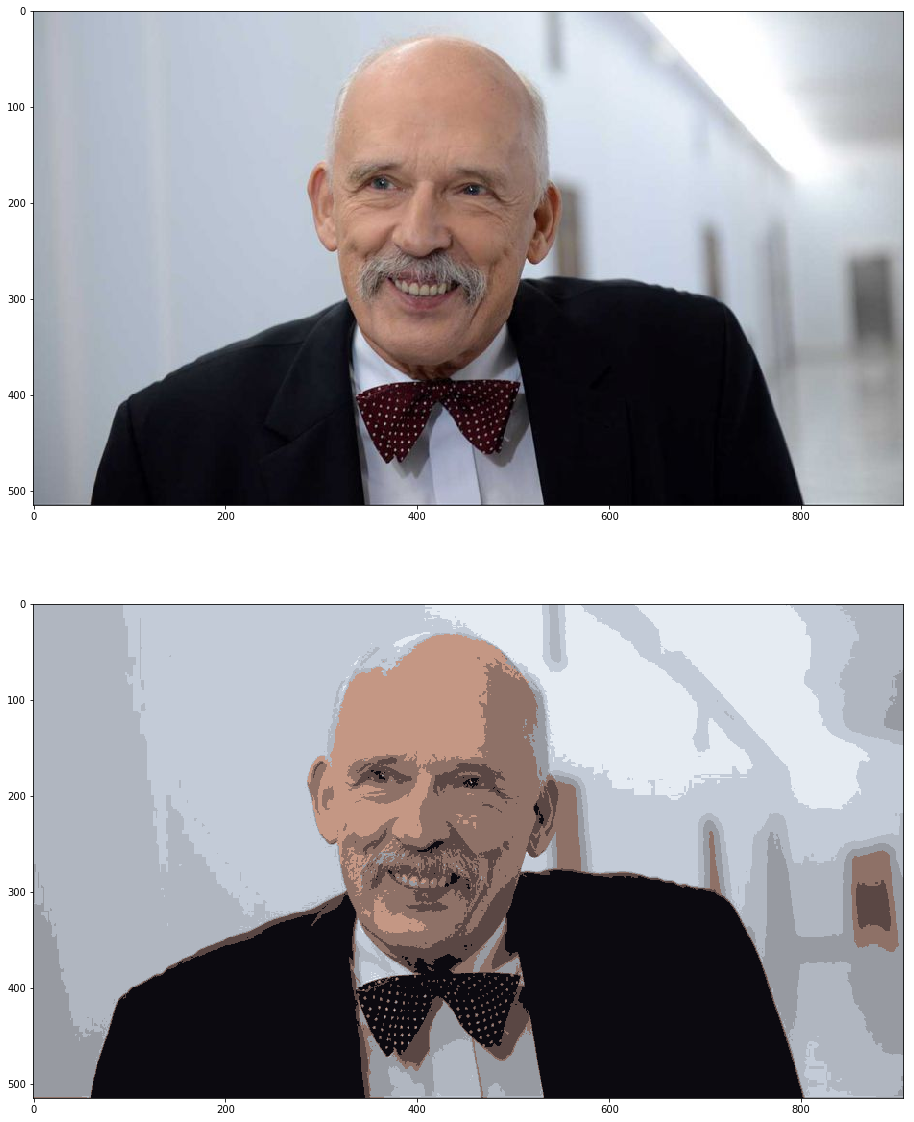

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,20)
img = cv.imread('korwin1.png')
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

b,g,r = cv.split(res2)       # get b,g,r
res2 = cv.merge([r,g,b])
b,g,r = cv.split(img)       # get b,g,r
img = cv.merge([r,g,b])

f = plt.figure()
f.add_subplot(2,1, 1)
plt.imshow(img)
f.add_subplot(2,1, 2)
plt.imshow(res2)
plt.show()